# Import libraries

In [9]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

In [10]:
# I tried to find something that relates to my project
# I couldn't find anything unfortunately
path = r'C:\Users\jecka\2023-12-05 Achievement 6'
anime = pd.read_csv(r'C:\Users\jecka\2023-12-05 Achievement 6\02 Data\Prepared Data\Anime Cleaned.csv', index_col = False)

# Consistancy check

In [11]:
# Define your parameters, such as indicator, country code, etc.
anime

,anime_id,title,country_origin,story_origin,type,score,scored_by,status,episodes,source,members,favorites,episode_duration,total_duration,rating,start_year,start_season,genres,demographics
0,1,Cowboy Bebop,Japan,Japan,tv,8.75,923377,finished_airing,26.0,original,1788584,79192,24.00,624.00,R,1998.0,spring,Action / Award Winning / Sci-Fi,NaN
1,5,Cowboy Bebop: Tengoku no Tobira,Japan,Japan,movie,8.38,207777,finished_airing,1.0,original,363968,1477,115.18,115.18,R,2001.0,summer,Action / Sci-Fi,NaN
2,6,Trigun,Japan,Japan,tv,8.22,359862,finished_airing,26.0,manga,733966,15265,24.67,641.33,PG_13,1998.0,spring,Action / Adventure / Sci-Fi,NaN
3,7,Witch Hunter Robin,Japan,Japan,tv,7.25,43038,finished_airing,26.0,original,112755,618,25.00,650.00,PG_13,2002.0,summer,Action / Drama / Mystery / Supernatural,NaN
4,8,Bouken Ou Beet,Japan,Japan,tv,6.94,6445,finished_airing,52.0,manga,15093,14,23.00,1196.00,PG,2004.0,fall,Adventure / Fantasy / Supernatural,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,56179,Delico's Nursery,Japan,Japan,tv,NaN,1,not_yet_aired,NaN,other,278,4,40.00,80.00,NaN,NaN,NaN,NaN,NaN
24979,56182,Urahara,Japan,Japan,NaN,NaN,0,not_yet_aired,NaN,original,223,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24980,56189,Grendizer U,Japan,Japan,tv,NaN,1,not_yet_aired,NaN,manga,561,4,NaN,NaN,NaN,2024.0,NaN,Action / Sci-Fi,NaN
24981,56196,Boku no Hero Academia: The Movie,Japan,Japan,movie,NaN,0,not_yet_aired,NaN,manga,10409,34,NaN,NaN,PG_13,NaN,NaN,Action,NaN


In [12]:
# Split genres and create new columns for each genre
genres = anime['genres'].str.get_dummies(sep=' / ')

# Concatenate the new genre columns with the original DataFrame
df_anime_binary = pd.concat([anime, genres], axis=1)

# Drop the original 'genres' column if needed
df_anime_binary.drop('genres', axis=1, inplace=True)

In [13]:
df_anime_binary.head()

,anime_id,title,country_origin,story_origin,type,score,scored_by,status,episodes,source,...,Gourmet,Hentai,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense
0,1,Cowboy Bebop,Japan,Japan,tv,8.75,923377,finished_airing,26.0,original,...,0,0,0,0,0,1,0,0,0,0
1,5,Cowboy Bebop: Tengoku no Tobira,Japan,Japan,movie,8.38,207777,finished_airing,1.0,original,...,0,0,0,0,0,1,0,0,0,0
2,6,Trigun,Japan,Japan,tv,8.22,359862,finished_airing,26.0,manga,...,0,0,0,0,0,1,0,0,0,0
3,7,Witch Hunter Robin,Japan,Japan,tv,7.25,43038,finished_airing,26.0,original,...,0,0,0,1,0,0,0,0,1,0
4,8,Bouken Ou Beet,Japan,Japan,tv,6.94,6445,finished_airing,52.0,manga,...,0,0,0,0,0,0,0,0,1,0


In [15]:
# Export to csv
df_anime_binary.to_csv(os.path.join(path,'02 Data','Prepared Data', 'Anime Cleaned.csv'), index=False)

In [6]:
anime['start_year'].value_counts()

start_year
2017.0    1217
2016.0    1181
2018.0    1163
2019.0    1133
2021.0    1102
          ... 
1951.0       3
1938.0       3
1937.0       2
1945.0       1
1944.0       1
Name: count, Length: 104, dtype: int64

In [7]:
# Drop rows with NaN values in 'start_year' column
anime = anime.dropna(subset=['start_year'])

# Convert 'start_year' column to integers
anime['start_year'] = anime['start_year'].astype(int)

# Create a subset

In [8]:
sub_tv = anime[anime['type'] == 'tv']

I've decided to only focus on the TV series this time around because they are more accessible and popular than the other "types" (Movies, specials, ova, etc.) so I believe the focus on this would be more beneficial than the data as a whole.

In [9]:
tv_avg=sub_tv.groupby('start_year').agg({'score': 'mean', 'anime_id': 'count'})

In [10]:
tv_avg.head(20)

,score,anime_id
start_year,,
1961,6.120000,1
1962,6.010000,1
1963,6.258000,6
1964,6.116667,3
1965,6.165714,13
1966,6.202222,11
1967,6.417778,14
1968,6.813750,14
1969,6.770909,17


In [11]:
tv_avg.tail(10)

,score,anime_id
start_year,,
2016,6.706316,370
2017,6.655047,363
2018,6.825644,344
2019,6.797257,311
2020,6.832695,302
2021,6.949211,230
2022,6.998333,217
2023,7.134730,228
2024,NaN,68


This version of the data I have was last updated in August 2023. There are titles on this list that had not yet aired so it would be easier to ignore those for this assessment. Also there are very few titles before 1965, whether it is because of the titles not yet being catalogued or not having any airing at that time, it isn't necessary at this time.

In [12]:
# Filter the subset with start_year between 1965 and 2022
sub_avg=tv_avg.loc['1965':'2022']

In [13]:
sub_avg.columns

Index(['score', 'anime_id'], dtype='object')

In [15]:
sub_avg

,score,anime_id
start_year,,
1965,6.165714,13
1966,6.202222,11
1967,6.417778,14
1968,6.813750,14
1969,6.770909,17
1970,6.845000,16
1971,6.324615,16
1972,6.606364,16
1973,6.444375,17


# Create a Linechart

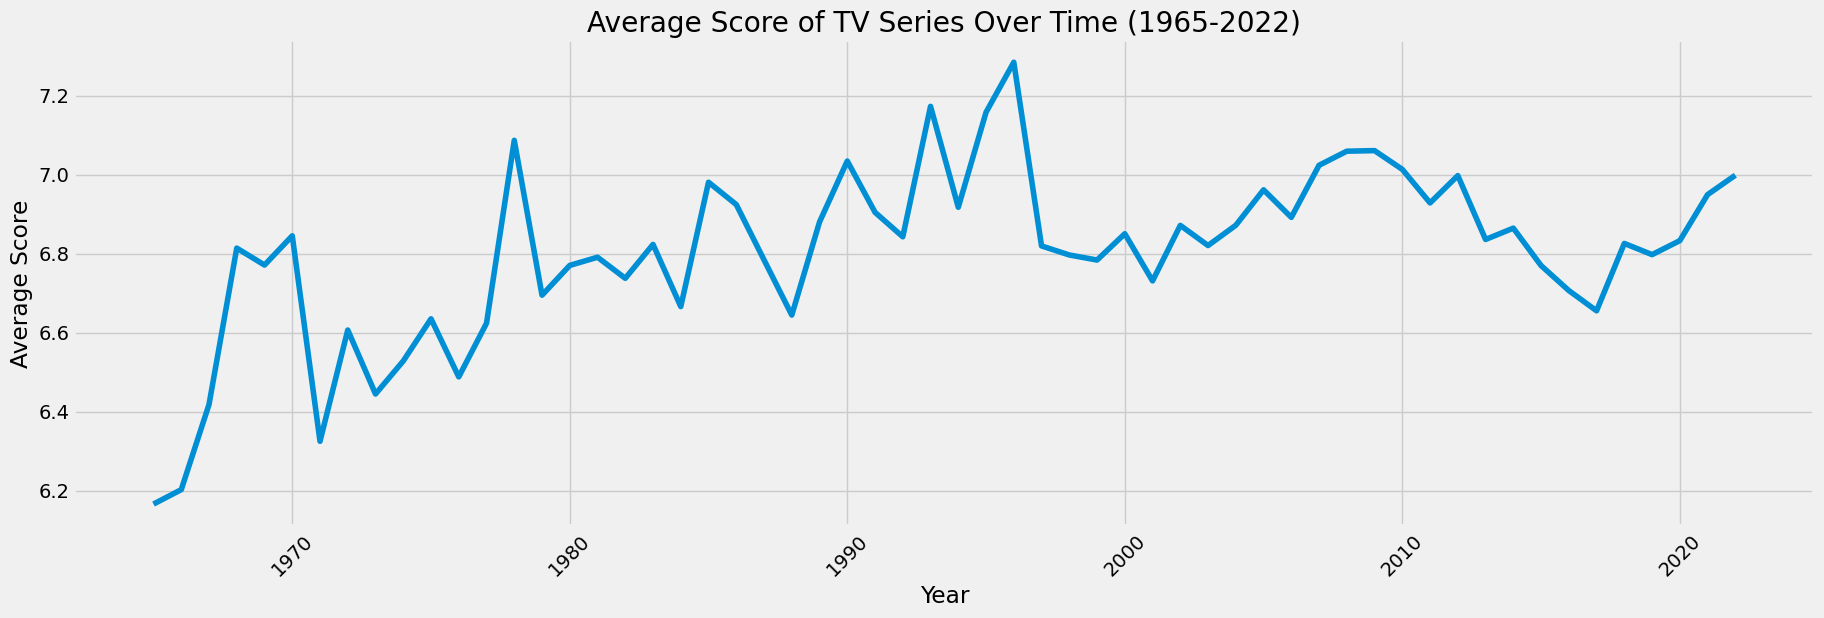

In [16]:
plt.figure(figsize=(20, 6))
plt.plot(sub_avg.index, sub_avg['score']) 
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.title('Average Score of TV Series Over Time (1965-2022)')
plt.grid(True)

plt.xticks(rotation=45)
plt.show()

As this is only for the entires/series that aired weekly this doesn't paint the whole picture but it is a good start.

# Decomposition

In [17]:
sub_avg.reset_index(inplace=True)

In [26]:
df=sub_avg[['start_year', 'score']]

In [27]:
df

,start_year,score
0,1965,6.165714
1,1966,6.202222
2,1967,6.417778
3,1968,6.813750
4,1969,6.770909
5,1970,6.845000
6,1971,6.324615
7,1972,6.606364
8,1973,6.444375
9,1974,6.528000


In [30]:
df['start_year'] = pd.to_datetime(df['start_year'], format='%Y')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   start_year  58 non-null     datetime64[ns]
 1   score       58 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 KB


In [34]:
df.set_index('start_year', inplace=True)

In [41]:
df

,score
start_year,
1965-01-01,6.165714
1966-01-01,6.202222
1967-01-01,6.417778
1968-01-01,6.813750
1969-01-01,6.770909
1970-01-01,6.845000
1971-01-01,6.324615
1972-01-01,6.606364
1973-01-01,6.444375


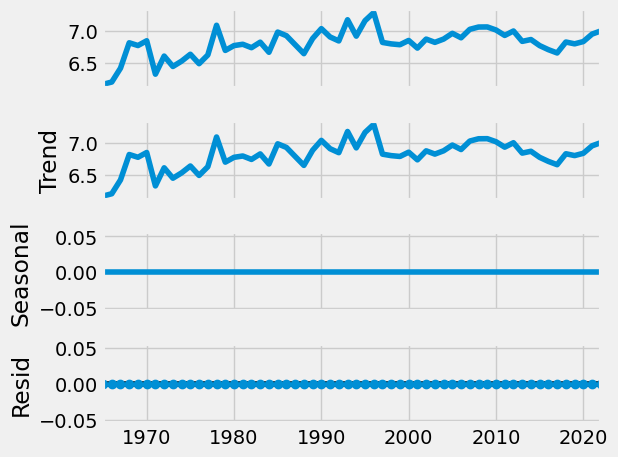

In [52]:
# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(df, model='additive')

# Plot the decomposition
decomposition.plot()
plt.tight_layout()
plt.show()

This is as I expected because the data I have is not useful for seasonal or residual tracking. Using the bit of information I have of the season it aired in could change this, how ever it wouldn't be 100% accurate either.

# Perform Dickey-Fuller test

In [57]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

# Define the function
def dickey_fuller(timeseries): 
    
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df['score'])

Dickey-Fuller Stationarity test:
Test Statistic                 -4.336758
p-value                         0.000383
Number of Lags Used             0.000000
Number of Observations Used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)           -2.594624
dtype: float64


The p-value proves a strong case against the null hypothesis. The time series is stationary as seen with the averages ranging between 6 and 7.5 and never being too drastically different.

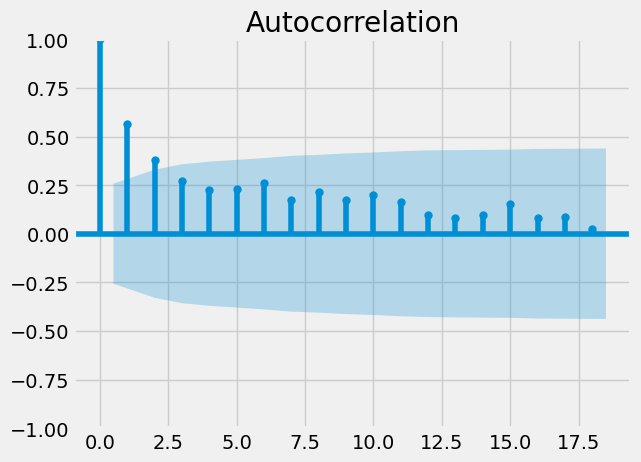

In [58]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(df)
plt.show()